# Miniproyecto 3    
* Ale Gudiel
* Diego Alvarez

## Ejercicio 4: Repartidor de Periódicos
https://towardsdatascience.com/monte-carlo-simulation-2b24fc810683

In [5]:
# Import Modules
import pandas as pd
import numpy  as np
from scipy import stats
from scipy.stats import uniform
from scipy.stats import sem
import matplotlib.pyplot as plt  

Mean Profit:  9.53


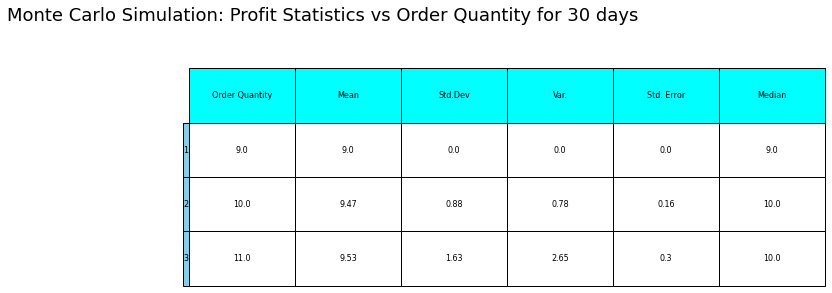

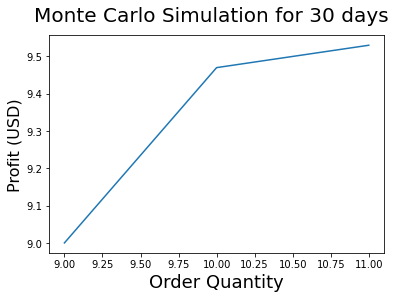

In [6]:
# .........................................
Price_Per_Unit   = 2.5
Cost_Per_Unit    = 1.5
Salvage_Per_Unit = 0.50
list_of_orders = [9,10,11]
length = len(list_of_orders)
daily_demand = [9,10,11]
pr1, pr2, pr3 = 0.3, 0.4, 0.3
# .........................................
pr1 = round(pr1, 2)
pr2 = round(pr1 + pr2,2)
pr3 = round(pr2 + pr3,2)
list_of_probs = [pr1, pr2, pr3]
df1 = pd.DataFrame(daily_demand, columns = ['demand'])
df2 = pd.DataFrame(list_of_probs,columns = ['range'])

df_demand = pd.concat([df1, df2], axis = 1)
column_labels = [   "Order Quantity", "Mean","Std.Dev","Var.",
                    "Std. Error","Median"]
df = pd.DataFrame(columns=column_labels)
# ...............................................
Number_of_Replications = 30
for j in range(length):
    list_of_profits = []
    for run in range(Number_of_Replications):
        # uniform distribution for a random variate
        r_v = uniform.rvs(size=1)

        for i,row in df_demand.iterrows():
            probab = df_demand.loc[i, 'range']             
            if r_v < probab:
                Qty_Demand = df_demand.loc[i, 'demand']
                break
        
        Qty_Ordered = list_of_orders[j]
        
        Qty_Sold = np.minimum(Qty_Demand, Qty_Ordered)
        Qty_Left = np.maximum(0, Qty_Ordered - Qty_Demand)
        
        Revenue_per_Sales = Qty_Sold * Price_Per_Unit        
        Revenue_per_Salvage = Qty_Left * Salvage_Per_Unit        
        Cost_per_Order =  Qty_Ordered * Cost_Per_Unit
        
        Profit = Revenue_per_Sales + Revenue_per_Salvage - Cost_per_Order        
        list_of_profits.append(Profit)
    
    media = np.mean(list_of_profits)
    stand = np.std(list_of_profits)
    var   = np.var(list_of_profits) 
    std_error = sem(list_of_profits)
    median = np.median(list_of_profits)
    
    dof  = Number_of_Replications - 1    
    t_crit = np.abs(stats.t.ppf((1-0.95)/2,dof))
    
    half_width=round(stand*t_crit/np.sqrt(Number_of_Replications),2)  
    inf = media - half_width
    sup = media + half_width  
    inf = round(float(inf),2)
    sup = round(float(sup),2)    

    list_of_statistics = []
    list_of_statistics.append(round(Qty_Ordered,2))
    list_of_statistics.append(round(media,2))
    list_of_statistics.append(round(stand,2))
    list_of_statistics.append(round(var,2))
    list_of_statistics.append(round(std_error,2))
    list_of_statistics.append(round(median,2))
    
    df.loc[len(df)] = list_of_statistics
    
fig, ax = plt.subplots(1,1)
ax.axis('tight')
ax.axis('off')
runs_table = ax.table(  cellText = df.values, 
                        colLabels = df.columns, 
                        rowLabels = df.index +1 ,
                        rowColours =["skyblue"]*(length), 
                        colColours =["cyan"]*11, 
                        cellLoc='center', loc="center",
                        bbox = [0.1, 0, 1.9, 1.0])
ax.set_title("Monte Carlo Simulation: Profit Statistics vs Order Quantity for 30 days", fontsize=18, y= 1.2 , pad = 4)
print("Mean Profit: ", round(np.mean(list_of_profits),2))
runs_table.auto_set_font_size(False)
runs_table.set_fontsize(8)                 
plt.show()
x  = df['Order Quantity']
y  = df['Mean']
fig, ax = plt.subplots()
ax.plot(x,y)
fig.suptitle('Monte Carlo Simulation for 30 days', fontsize=20)
plt.xlabel('Order Quantity', fontsize=18)
plt.ylabel('Profit (USD)', fontsize=16)
plt.show()

Mean Profit:  9.02


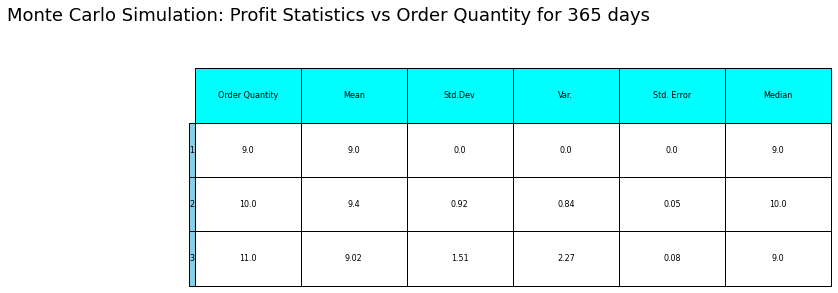

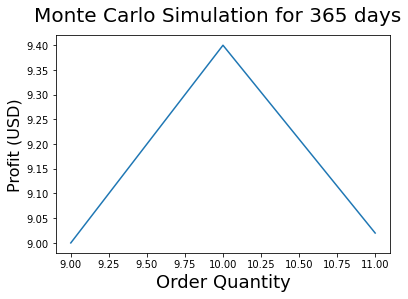

In [7]:
# .........................................
Price_Per_Unit   = 2.5
Cost_Per_Unit    = 1.5
Salvage_Per_Unit = 0.50
list_of_orders = [9,10,11]
length = len(list_of_orders)
daily_demand = [9,10,11]
pr1, pr2, pr3 = 0.3, 0.4, 0.3
# .........................................
pr1 = round(pr1, 2)
pr2 = round(pr1 + pr2,2)
pr3 = round(pr2 + pr3,2)
list_of_probs = [pr1, pr2, pr3]
df1 = pd.DataFrame(daily_demand, columns = ['demand'])
df2 = pd.DataFrame(list_of_probs,columns = ['range'])

df_demand = pd.concat([df1, df2], axis = 1)
column_labels = [   "Order Quantity", "Mean","Std.Dev","Var.",
                    "Std. Error","Median"]
df = pd.DataFrame(columns=column_labels)
# ...............................................
Number_of_Replications = 365
for j in range(length):
    list_of_profits = []
    for run in range(Number_of_Replications):
        # uniform distribution for a random variate
        r_v = uniform.rvs(size=1)

        for i,row in df_demand.iterrows():
            probab = df_demand.loc[i, 'range']             
            if r_v < probab:
                Qty_Demand = df_demand.loc[i, 'demand']
                break
        
        Qty_Ordered = list_of_orders[j]
        
        Qty_Sold = np.minimum(Qty_Demand, Qty_Ordered)
        Qty_Left = np.maximum(0, Qty_Ordered - Qty_Demand)
        
        Revenue_per_Sales = Qty_Sold * Price_Per_Unit        
        Revenue_per_Salvage = Qty_Left * Salvage_Per_Unit        
        Cost_per_Order =  Qty_Ordered * Cost_Per_Unit
        
        Profit = Revenue_per_Sales + Revenue_per_Salvage - Cost_per_Order        
        list_of_profits.append(Profit)
    
    media = np.mean(list_of_profits)
    stand = np.std(list_of_profits)
    var   = np.var(list_of_profits) 
    std_error = sem(list_of_profits)
    median = np.median(list_of_profits)
    
    dof  = Number_of_Replications - 1    
    t_crit = np.abs(stats.t.ppf((1-0.95)/2,dof))
    
    half_width=round(stand*t_crit/np.sqrt(Number_of_Replications),2)  
    inf = media - half_width
    sup = media + half_width  
    inf = round(float(inf),2)
    sup = round(float(sup),2)    

    list_of_statistics = []
    list_of_statistics.append(round(Qty_Ordered,2))
    list_of_statistics.append(round(media,2))
    list_of_statistics.append(round(stand,2))
    list_of_statistics.append(round(var,2))
    list_of_statistics.append(round(std_error,2))
    list_of_statistics.append(round(median,2))
    
    df.loc[len(df)] = list_of_statistics
    
fig, ax = plt.subplots(1,1)
ax.axis('tight')
ax.axis('off')
runs_table = ax.table(  cellText = df.values, 
                        colLabels = df.columns, 
                        rowLabels = df.index +1 ,
                        rowColours =["skyblue"]*(length), 
                        colColours =["cyan"]*11, 
                        cellLoc='center', loc="center",
                        bbox = [0.1, 0, 1.9, 1.0])
ax.set_title("Monte Carlo Simulation: Profit Statistics vs Order Quantity for 365 days", fontsize=18, y= 1.2 , pad = 4)
print("Mean Profit: ", round(np.mean(list_of_profits),2))
runs_table.auto_set_font_size(False)
runs_table.set_fontsize(8)                 
plt.show()
x  = df['Order Quantity']
y  = df['Mean']
fig, ax = plt.subplots()
ax.plot(x,y)
fig.suptitle('Monte Carlo Simulation for 365 days', fontsize=20)
plt.xlabel('Order Quantity', fontsize=18)
plt.ylabel('Profit (USD)', fontsize=16)
plt.show()

Mean Profit:  9.0


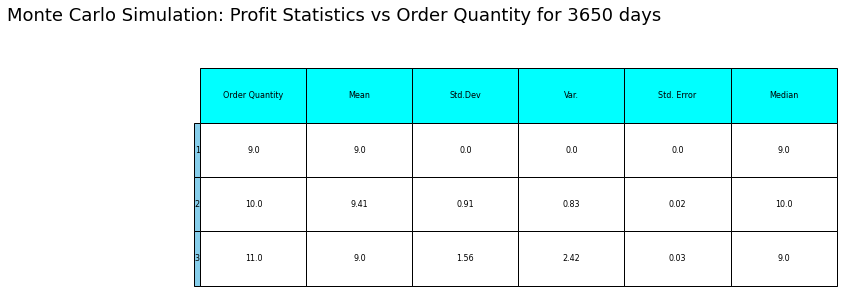

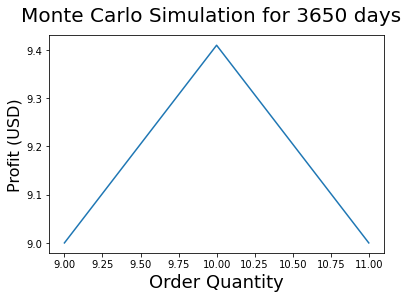

In [8]:
# .........................................
Price_Per_Unit   = 2.5
Cost_Per_Unit    = 1.5
Salvage_Per_Unit = 0.50
list_of_orders = [9,10,11]
length = len(list_of_orders)
daily_demand = [9,10,11]
pr1, pr2, pr3 = 0.3, 0.4, 0.3
# .........................................
pr1 = round(pr1, 2)
pr2 = round(pr1 + pr2,2)
pr3 = round(pr2 + pr3,2)
list_of_probs = [pr1, pr2, pr3]
df1 = pd.DataFrame(daily_demand, columns = ['demand'])
df2 = pd.DataFrame(list_of_probs,columns = ['range'])

df_demand = pd.concat([df1, df2], axis = 1)
column_labels = [   "Order Quantity", "Mean","Std.Dev","Var.",
                    "Std. Error","Median"]
df = pd.DataFrame(columns=column_labels)
# ...............................................
Number_of_Replications = 3650
for j in range(length):
    list_of_profits = []
    for run in range(Number_of_Replications):
        # uniform distribution for a random variate
        r_v = uniform.rvs(size=1)

        for i,row in df_demand.iterrows():
            probab = df_demand.loc[i, 'range']             
            if r_v < probab:
                Qty_Demand = df_demand.loc[i, 'demand']
                break
        
        Qty_Ordered = list_of_orders[j]
        
        Qty_Sold = np.minimum(Qty_Demand, Qty_Ordered)
        Qty_Left = np.maximum(0, Qty_Ordered - Qty_Demand)
        
        Revenue_per_Sales = Qty_Sold * Price_Per_Unit        
        Revenue_per_Salvage = Qty_Left * Salvage_Per_Unit        
        Cost_per_Order =  Qty_Ordered * Cost_Per_Unit
        
        Profit = Revenue_per_Sales + Revenue_per_Salvage - Cost_per_Order        
        list_of_profits.append(Profit)
    
    media = np.mean(list_of_profits)
    stand = np.std(list_of_profits)
    var   = np.var(list_of_profits) 
    std_error = sem(list_of_profits)
    median = np.median(list_of_profits)
    
    dof  = Number_of_Replications - 1    
    t_crit = np.abs(stats.t.ppf((1-0.95)/2,dof))
    
    half_width=round(stand*t_crit/np.sqrt(Number_of_Replications),2)  
    inf = media - half_width
    sup = media + half_width  
    inf = round(float(inf),2)
    sup = round(float(sup),2)    

    list_of_statistics = []
    list_of_statistics.append(round(Qty_Ordered,2))
    list_of_statistics.append(round(media,2))
    list_of_statistics.append(round(stand,2))
    list_of_statistics.append(round(var,2))
    list_of_statistics.append(round(std_error,2))
    list_of_statistics.append(round(median,2))
    
    df.loc[len(df)] = list_of_statistics
    
fig, ax = plt.subplots(1,1)
ax.axis('tight')
ax.axis('off')
runs_table = ax.table(  cellText = df.values, 
                        colLabels = df.columns, 
                        rowLabels = df.index +1 ,
                        rowColours =["skyblue"]*(length), 
                        colColours =["cyan"]*11, 
                        cellLoc='center', loc="center",
                        bbox = [0.1, 0, 1.9, 1.0])
ax.set_title("Monte Carlo Simulation: Profit Statistics vs Order Quantity for 3650 days", fontsize=18, y= 1.2 , pad = 4)
print("Mean Profit: ", round(np.mean(list_of_profits),2))
runs_table.auto_set_font_size(False)
runs_table.set_fontsize(8)                 
plt.show()
x  = df['Order Quantity']
y  = df['Mean']
fig, ax = plt.subplots()
ax.plot(x,y)
fig.suptitle('Monte Carlo Simulation for 3650 days', fontsize=20)
plt.xlabel('Order Quantity', fontsize=18)
plt.ylabel('Profit (USD)', fontsize=16)
plt.show()